To Compare Boston local data vs Massachusetts for disease incidence, Download the Massachusetts data from the 2021 Global Burden of Disease study available at https://vizhub.healthdata.org/gbd-results/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ma_df = pd.read_csv("IHME-GBD_2021_DATA-4cce5613-1/IHME-GBD_2021_DATA-4cce5613-1.csv")
ma_df

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,47341.888447,73127.485215,36132.224131
1,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,33449.957835,42313.702018,26903.429256
2,5,Prevalence,102,United States of America,3,Both,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,80791.846282,106412.848972,67620.230533
3,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.007713,0.011676,0.005877
4,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.005197,0.006559,0.004158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66523,6,Incidence,102,United States of America,2,Female,26,70+ years,526,Digestive diseases,2,Percent,2018,0.030080,0.033838,0.025954
66524,6,Incidence,102,United States of America,3,Both,26,70+ years,526,Digestive diseases,2,Percent,2018,0.029781,0.033613,0.025855
66525,6,Incidence,544,Massachusetts,1,Male,26,70+ years,526,Digestive diseases,2,Percent,2018,0.028426,0.032210,0.024762
66526,6,Incidence,544,Massachusetts,2,Female,26,70+ years,526,Digestive diseases,2,Percent,2018,0.028884,0.032426,0.025040


In [3]:
# Display basic information about the DataFrame
print(ma_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66528 entries, 0 to 66527
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     66528 non-null  int64  
 1   measure_name   66528 non-null  object 
 2   location_id    66528 non-null  int64  
 3   location_name  66528 non-null  object 
 4   sex_id         66528 non-null  int64  
 5   sex_name       66528 non-null  object 
 6   age_id         66528 non-null  int64  
 7   age_name       66528 non-null  object 
 8   cause_id       66528 non-null  int64  
 9   cause_name     66528 non-null  object 
 10  metric_id      66528 non-null  int64  
 11  metric_name    66528 non-null  object 
 12  year           66528 non-null  int64  
 13  val            66528 non-null  float64
 14  upper          66528 non-null  float64
 15  lower          66528 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 8.1+ MB
None


In [4]:
# Display summary statistics
print(ma_df.describe())

         measure_id   location_id        sex_id        age_id      cause_id  \
count  66528.000000  66528.000000  66528.000000  66528.000000  66528.000000   
mean       5.500000    323.000000      2.000000     20.166667    690.545455   
std        0.500004    221.001661      0.816503      8.668334    208.795667   
min        5.000000    102.000000      1.000000      1.000000    344.000000   
25%        5.000000    102.000000      1.000000     22.000000    526.000000   
50%        5.500000    323.000000      2.000000     23.500000    661.000000   
75%        6.000000    544.000000      3.000000     25.000000    956.000000   
max        6.000000    544.000000      3.000000     26.000000    974.000000   

          metric_id          year           val         upper         lower  
count  66528.000000  66528.000000  6.652800e+04  6.652800e+04  6.652800e+04  
mean       2.000000   2014.500000  2.256407e+06  2.507339e+06  2.028477e+06  
std        0.816503      4.031159  1.982590e+07  2.210

In [5]:
# Check for missing values
print(ma_df.isnull().sum())

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64


In [6]:
# Drop columns with "_id" in the name
ma_df = ma_df.drop(columns=[col for col in ma_df.columns if "_id" in col])

In [7]:
ma_df

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Prevalence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Number,2008,47341.888447,73127.485215,36132.224131
1,Prevalence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Number,2008,33449.957835,42313.702018,26903.429256
2,Prevalence,United States of America,Both,<5 years,Neglected tropical diseases and malaria,Number,2008,80791.846282,106412.848972,67620.230533
3,Prevalence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Percent,2008,0.007713,0.011676,0.005877
4,Prevalence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Percent,2008,0.005197,0.006559,0.004158
...,...,...,...,...,...,...,...,...,...,...
66523,Incidence,United States of America,Female,70+ years,Digestive diseases,Percent,2018,0.030080,0.033838,0.025954
66524,Incidence,United States of America,Both,70+ years,Digestive diseases,Percent,2018,0.029781,0.033613,0.025855
66525,Incidence,Massachusetts,Male,70+ years,Digestive diseases,Percent,2018,0.028426,0.032210,0.024762
66526,Incidence,Massachusetts,Female,70+ years,Digestive diseases,Percent,2018,0.028884,0.032426,0.025040


In [8]:
for column in ma_df.columns:
    if column not in ["val", "upper", "lower"]:
        print(f"Unique value in {column}: {ma_df[column].unique()}")

Unique value in measure_name: ['Prevalence' 'Incidence']
Unique value in location_name: ['United States of America' 'Massachusetts']
Unique value in sex_name: ['Male' 'Female' 'Both']
Unique value in age_name: ['<5 years' 'All ages' '5-14 years' '15-49 years' '50-69 years'
 '70+ years']
Unique value in cause_name: ['Neglected tropical diseases and malaria' 'Unintentional injuries'
 'Self-harm and interpersonal violence'
 'Respiratory infections and tuberculosis' 'Enteric infections'
 'Maternal and neonatal disorders' 'Substance use disorders'
 'Neurological disorders' 'Neoplasms' 'Skin and subcutaneous diseases'
 'HIV/AIDS and sexually transmitted infections' 'Mental disorders'
 'Sense organ diseases' 'Other non-communicable diseases'
 'Nutritional deficiencies' 'Other infectious diseases'
 'Diabetes and kidney diseases' 'Cardiovascular diseases'
 'Chronic respiratory diseases' 'Digestive diseases'
 'Musculoskeletal disorders' 'Transport injuries']
Unique value in metric_name: ['Number

In [9]:
# 1. Comparison of prevalence across different causes
def plot_prevalence_by_cause():
    prevalence_data = ma_df[(ma_df['measure_name'] == 'Prevalence') & 
                            (ma_df['metric_name'] == 'Percent') & 
                            (ma_df['sex_name'] == 'Both') & 
                            (ma_df['age_name'] == 'All ages') &
                            (ma_df['location_name'] == "Massachusetts")]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cause_name', y='val', data=prevalence_data)
    plt.title('Prevalence of Different Causes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

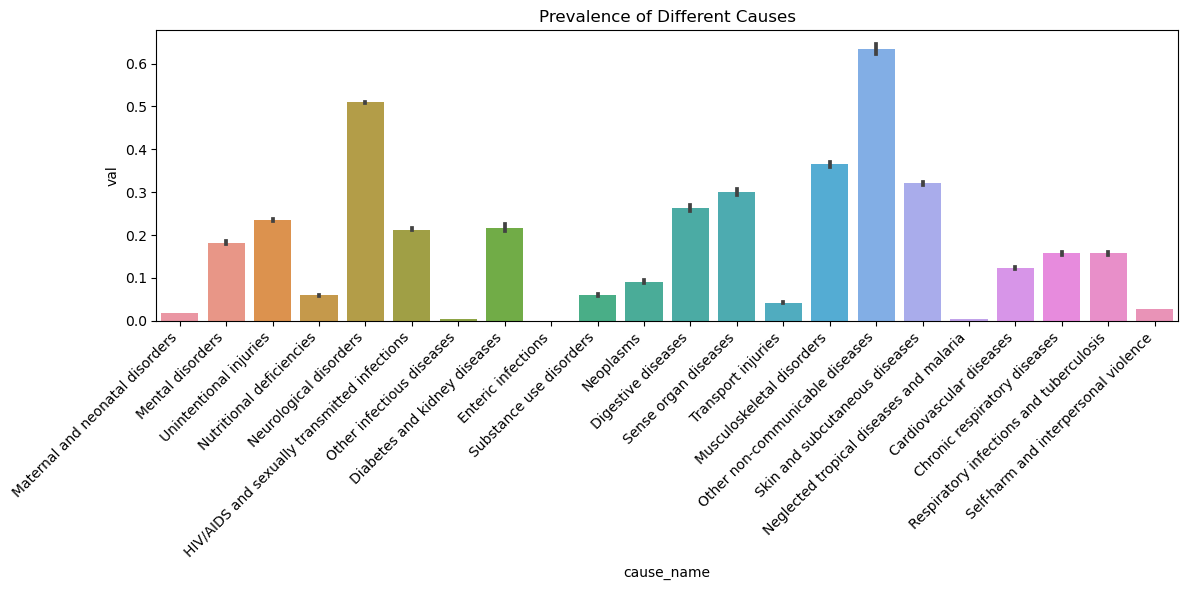

In [10]:
plot_prevalence_by_cause()

In [11]:
# 3. Gender comparison
def plot_gender_comparison():
    gender_data = ma_df[(ma_df['measure_name'] == 'Prevalence') & 
                        (ma_df['metric_name'] == 'Percent') & 
                        (ma_df['cause_name'] == 'Mental disorders') & (ma_df['location_name'] == "Massachusetts")]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='age_name', y='val', hue='sex_name', data=gender_data)
    plt.title('Prevalence of Mental Disorders by Age and Gender')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

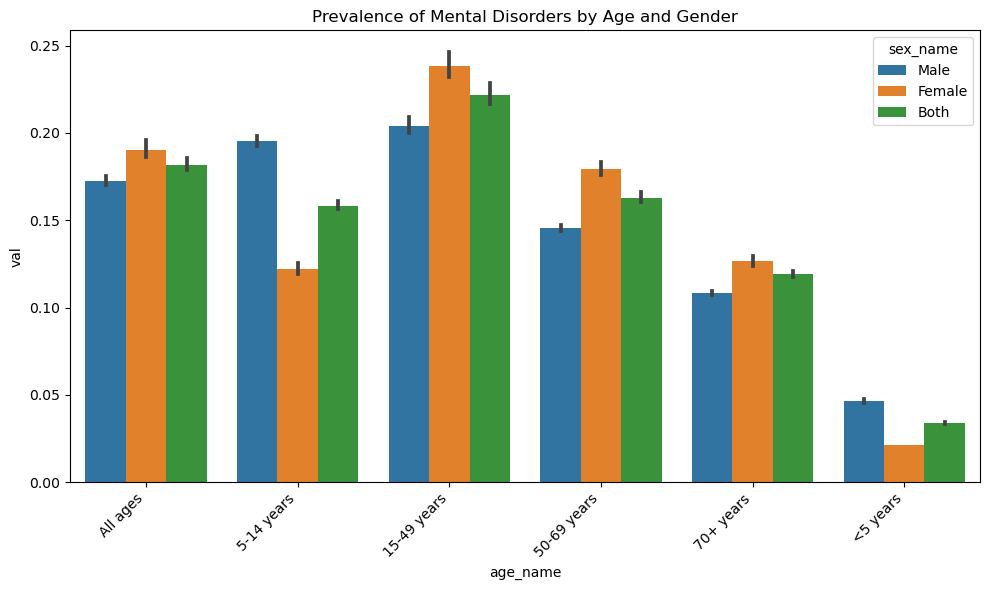

In [12]:
plot_gender_comparison()

In [13]:
# 4. Correlation analysis
def correlation_analysis():
    pivot_df = ma_df.pivot_table(values='val', 
                                 index=['year', 'sex_name', 'age_name'], 
                                 columns='cause_name')
    correlation_matrix = pivot_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Between Different Causes')
    plt.tight_layout()
    plt.show()

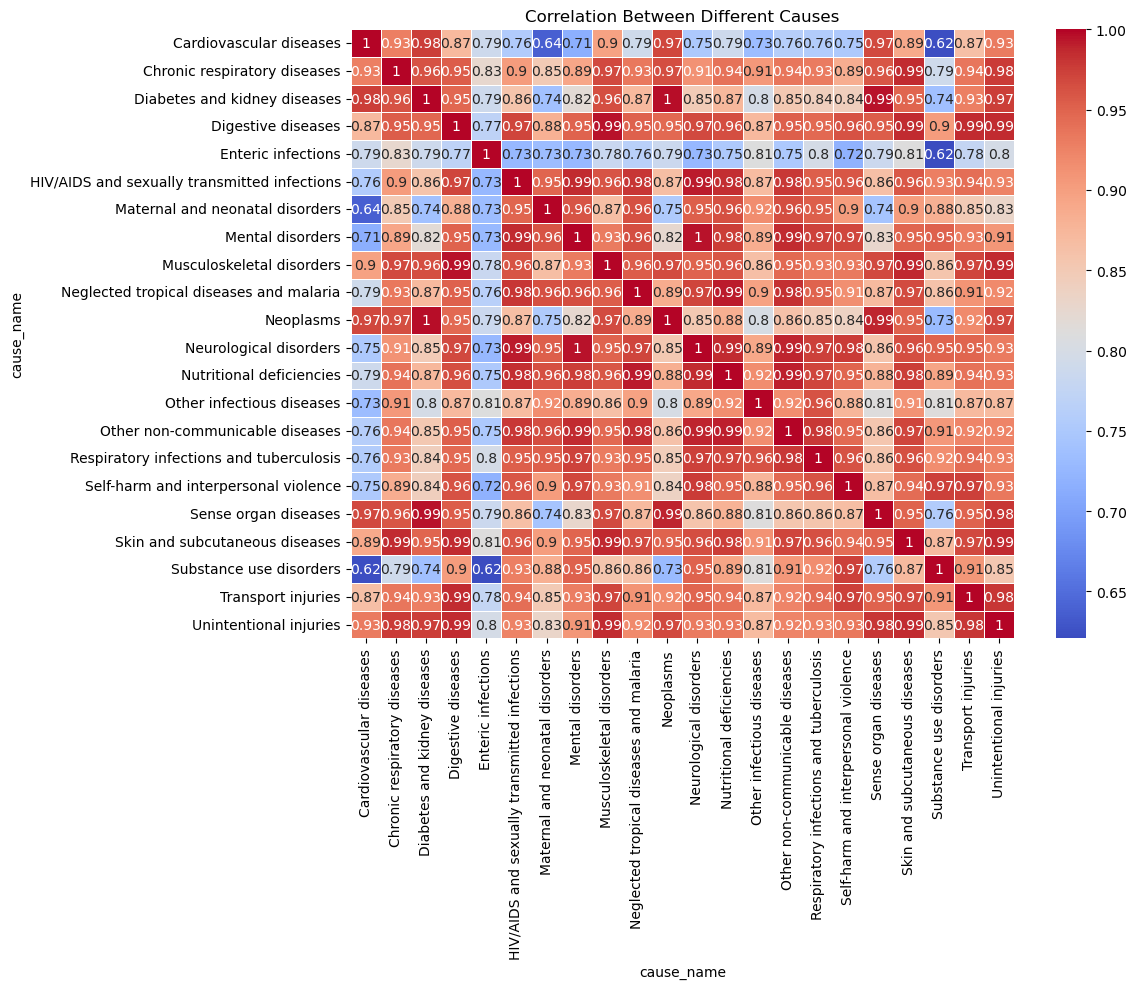

In [14]:
correlation_analysis()

In [15]:
# 5. Age group analysis
def plot_age_group_analysis():
    age_data = ma_df[(ma_df['measure_name'] == 'Prevalence') & 
                     (ma_df['metric_name'] == 'Percent') & 
                     (ma_df['sex_name'] == 'Both')]
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='age_name', y='val', data=age_data)
    plt.title('Distribution of Prevalence Across Age Groups')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

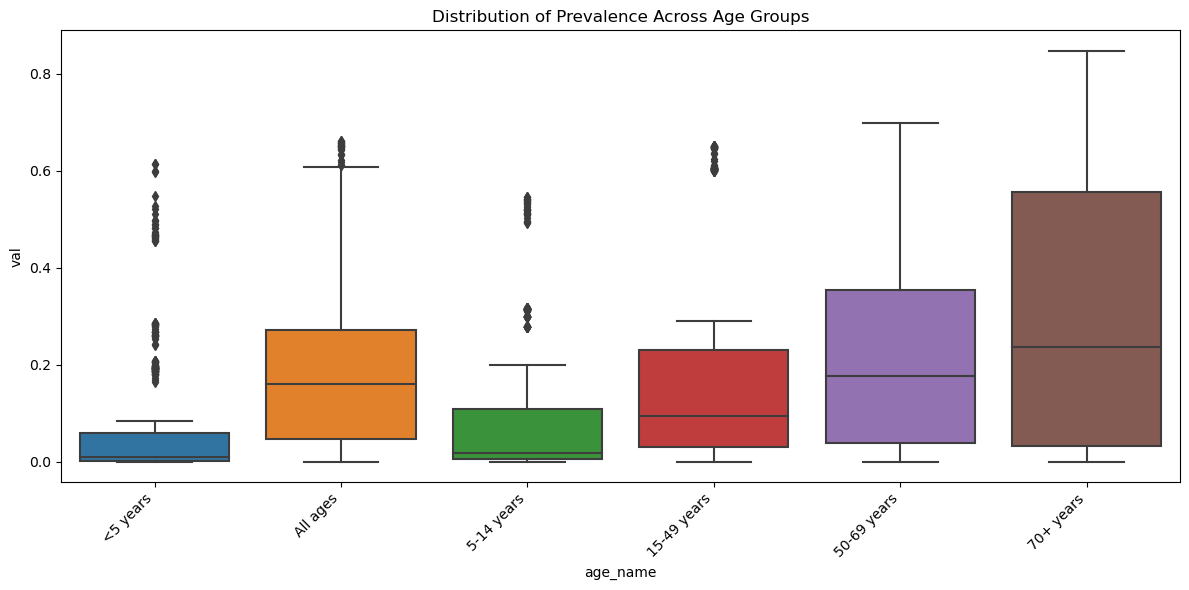

In [16]:
plot_age_group_analysis()

Aggregation MIMIC data

We will need those information for each patient: time, icd, sex, age, year, and the key column
Since we will calculate the incidence, we might also need the population informatin covered by MIMIC IV hospital.
Alternatively, we could calculate the rate between different disease instead of getting a absolute incidence. 
Maybe calcualte the percentage of each disease

In [17]:
patients_df = pd.read_csv("physionet.org/files/mimiciv/3.0/hosp/patients.csv.gz")

In [18]:
patients_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [21]:
edstays_df = pd.read_csv("physionet.org/files/mimic-iv-ed/2.2/ed/edstays.csv.gz")
edstays_df

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED
...,...,...,...,...,...,...,...,...,...
425082,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED
425083,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED
425084,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED
425085,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED


In [28]:
merged_df = pd.merge(patients_df, edstays_df, on='subject_id', how='inner')
merged_df

,subject_id,gender_x,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,intime,outtime,gender_y,race,arrival_transport,disposition
0,10000032,F,52,2180,2014 - 2016,2180-09-09,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,F,52,2180,2014 - 2016,2180-09-09,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,F,52,2180,2014 - 2016,2180-09-09,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425006,19999784,M,57,2119,2017 - 2019,NaN,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED
425007,19999828,F,46,2147,2017 - 2019,NaN,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED
425008,19999828,F,46,2147,2017 - 2019,NaN,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED
425009,19999914,F,49,2158,2017 - 2019,NaN,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED


In [19]:
diagnosis_df = pd.read_csv("physionet.org/files/mimic-iv-ed/2.2/ed/diagnosis.csv.gz")
diagnosis_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [30]:
diagnosis_grouped_df = diagnosis_df.groupby('stay_id').agg(list).reset_index()
diagnosis_grouped_df

,stay_id,subject_id,seq_num,icd_code,icd_version,icd_title
0,30000012,"[11714491, 11714491]","[1, 2]","[5722, 5990]","[9, 9]","[HEPATIC ENCEPHALOPATHY, URIN TRACT INFECTION ..."
1,30000017,"[14230614, 14230614, 14230614, 14230614, 14230...","[1, 2, 3, 4, 5]","[30300, 4019, 07070, V08, V600]","[9, 9, 9, 9, 9]","[AC ALCOHOL INTOX-UNSPEC, HYPERTENSION NOS, UN..."
2,30000038,[13821532],[1],[J189],[10],"[Pneumonia, unspecified organism]"
3,30000039,"[13340997, 13340997, 13340997, 13340997]","[1, 2, 3, 4]","[8054, 8052, E8889, 80709]","[9, 9, 9, 9]","[FX LUMBAR VERTEBRA-CLOSE, FX DORSAL VERTEBRA-..."
4,30000055,"[19848164, 19848164]","[1, 2]","[3804, 4019]","[9, 9]","[IMPACTED CERUMEN, HYPERTENSION NOS]"
...,...,...,...,...,...,...
423984,39999939,"[17255106, 17255106, 17255106]","[1, 2, 3]","[78650, 4019, 2724]","[9, 9, 9]","[CHEST PAIN NOS, HYPERTENSION NOS, HYPERLIPIDE..."
423985,39999953,"[15768202, 15768202]","[1, 2]","[7840, 7851]","[9, 9]","[HEADACHE, PALPITATIONS]"
423986,39999961,"[11302781, 11302781, 11302781]","[1, 2, 3]","[I2699, R079, R0600]","[10, 10, 10]",[Other pulmonary embolism without acute cor pu...
423987,39999964,"[16479007, 16479007]","[1, 2]","[F329, R45851]","[10, 10]","[Major depressive disorder, single episode, un..."


In [31]:
merged_df = pd.merge(merged_df, diagnosis_grouped_df, on='stay_id', how='inner')

In [32]:
merged_df

,subject_id_x,gender_x,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,intime,outtime,gender_y,race,arrival_transport,disposition,subject_id_y,seq_num,icd_code,icd_version,icd_title
0,10000032,F,52,2180,2014 - 2016,2180-09-09,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032, 10000032]","[1, 2, 3, 4]","[5728, 78959, 07070, V08]","[9, 9, 9, 9]","[OTH SEQUELA, CHR LIV DIS, OTHER ASCITES, UNSP..."
1,10000032,F,52,2180,2014 - 2016,2180-09-09,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032, 10000032]","[1, 2, 3, 4]","[78959, 07070, 5715, V08]","[9, 9, 9, 9]","[OTHER ASCITES, UNSPECIFIED VIRAL HEPATITIS C ..."
2,10000032,F,52,2180,2014 - 2016,2180-09-09,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032]","[1, 2, 3]","[5715, 78900, V08]","[9, 9, 9]","[CIRRHOSIS OF LIVER NOS, ABDOMINAL PAIN UNSPEC..."
3,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,"[10000032, 10000032, 10000032]","[1, 2, 3]","[4589, 07070, V08]","[9, 9, 9]","[HYPOTENSION NOS, UNSPECIFIED VIRAL HEPATITIS ..."
4,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032]","[1, 2]","[78097, 34830]","[9, 9]","[ALTERED MENTAL STATUS , ENCEPHALOPATHY, UNSPE..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423908,19999784,M,57,2119,2017 - 2019,NaN,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,[19999784],[1],[R531],[10],[Weakness]
423909,19999828,F,46,2147,2017 - 2019,NaN,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,"[19999828, 19999828]","[1, 2]","[E1110, Z7984]","[10, 10]",[Type 2 diabetes mellitus with ketoacidosis wi...
423910,19999828,F,46,2147,2017 - 2019,NaN,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,[19999828],[1],[K632],[10],[Fistula of intestine]
423911,19999914,F,49,2158,2017 - 2019,NaN,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,[19999914],[1],[R4182],[10],"[Altered mental status, unspecified]"


In [33]:
merged_df.to_csv("milestone_merge.csv")